In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))   # Normalizes to [-1,1]
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=128,
    shuffle=True
)

print("Dataset Loaded")

100%|██████████| 170M/170M [00:06<00:00, 24.6MB/s]


Dataset Loaded


In [4]:
class EncoderDecoder(nn.Module):
    def __init__(self):
        super(EncoderDecoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.ReLU(True),

            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(True)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = EncoderDecoder().to(device)
print("Model Created")

Model Created


In [5]:
criterion = nn.L1Loss()    # Change to nn.MSELoss() if needed
optimizer = optim.Adam(model.parameters(), lr=0.0002)

print("Loss and Optimizer Set")

Loss and Optimizer Set


In [6]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0

    for images, _ in trainloader:
        images = images.to(device)

        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(trainloader):.4f}")

print("Training Finished")

Epoch [1/10] Loss: 0.1145
Epoch [2/10] Loss: 0.0589
Epoch [3/10] Loss: 0.0483
Epoch [4/10] Loss: 0.0419
Epoch [5/10] Loss: 0.0381
Epoch [6/10] Loss: 0.0351
Epoch [7/10] Loss: 0.0330
Epoch [8/10] Loss: 0.0312
Epoch [9/10] Loss: 0.0297
Epoch [10/10] Loss: 0.0285
Training Finished


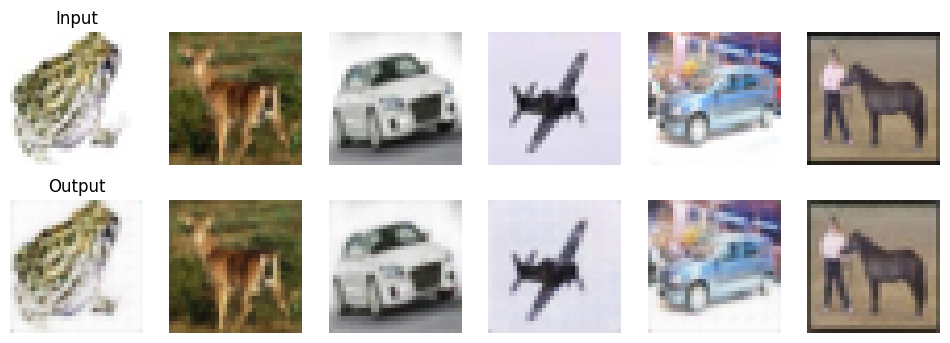

In [8]:
def denormalize(img):
    img = img * 0.5 + 0.5
    return img

dataiter = iter(trainloader)
images, _ = next(dataiter)
images = images.to(device)

outputs = model(images)

images = denormalize(images.cpu())
outputs = denormalize(outputs.cpu())

fig, axes = plt.subplots(2, 6, figsize=(12,4))

for i in range(6):
    axes[0, i].imshow(images[i].permute(1,2,0).detach())
    axes[0, i].axis("off")

    axes[1, i].imshow(outputs[i].permute(1,2,0).detach())
    axes[1, i].axis("off")

axes[0,0].set_title("Input")
axes[1,0].set_title("Output")

plt.show()